In [1]:
import pandas as pd
import seaborn as sns
import rho_plus as rp
from baysic.utils import quick_view, json_to_df
IS_DARK = True
theme, cs = rp.mpl_setup(IS_DARK)
rp.plotly_setup(IS_DARK)

No module named 'phonopy'


In [2]:
df = pd.read_pickle('merged_test_data3.pkl')
task_df = df.query('CrystalSystem == "Cubic"').sort_values('nsites')
task_df.head()

,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,struct
160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,"[[1.42361461 1.42361461 1.42361461] Ga, [0. 0...."
166,mp-2226,DyPd,2,221,2,Dy Pd,Cubic,binary_easy,0,"[[0. 0. 0.] Dy, [1.74230512 1.74230512 1.74230..."
164,mp-1169,ScCu,2,221,2,Cu Sc,Cubic,binary_easy,0,"[[1.62043406 1.62043406 1.62043406] Sc, [0. 0...."
163,mp-2334,DyCu,2,221,2,Cu Dy,Cubic,binary_easy,0,"[[0. 0. 0.] Dy, [1.7180388 1.7180388 1.7180388..."
157,mp-30746,YIr,2,221,2,Ir Y,Cubic,binary_easy,0,"[[1.708167 1.708167 1.708167] Y, [0. 0. 0.] Ir]"


In [3]:
from copy import deepcopy
from baysic.structure_evaluation import point_energy, relaxed_energy

true_relaxed = []
true_e_form = []
for struct in task_df['struct']:
    rel, ef = relaxed_energy(deepcopy(struct))
    true_relaxed.append(rel)
    true_e_form.append(ef)
    
task_df['true_relaxed'] = true_relaxed
task_df['true_e_form'] = true_e_form
task_df.head()

KeyboardInterrupt: 

In [5]:
from pathlib import Path

run_id = Path('logs/09-29/1')

inds = []
dfs = []
for i, struct in zip(task_df.index, task_df['struct']):
    path = run_id / f"{struct.formula.replace(' ', '')}.json"
    if path.exists():
        dfs.append(json_to_df(path))
        inds.append(i)

In [129]:
# from copy import deepcopy
# from baysic.structure_evaluation import relaxed_energy
# from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
# from pyxtal import Wyckoff_position
# from baysic.utils import df_to_json


# rows = []


# for run in dfs:
#     row = {}
#     run = run.sort_values('e_form')

#     row['best_struct'], row['raw_e_form'], row['lat_a'], row['lat_vol'] = run.iloc[0][['gen', 'e_form', 'lat_a', 'lat_vol']]
#     row['best_relaxed'], row['best_energy'] = relaxed_energy(deepcopy(row['best_struct']), long=True)
#     sga = SpacegroupAnalyzer(row['best_struct'])
#     sg_data = sga.get_symmetry_dataset()
#     row['symm'] = sga.get_symmetrized_structure()
#     row['conv'] = sga.get_conventional_standard_structure()
#     row['run_sg'] = sg_data['number']
#     row['run_sg_symbol'] = sg_data['international']
#     row['wps'] = [Wyckoff_position.from_group_and_letter(row['run_sg'], letter) for letter in set(row['symm'].wyckoff_symbols)]
#     rows.append(row)

# run_df = pd.DataFrame.from_records(rows)
# df = pd.concat([task_df.iloc[run_df.index].reset_index(), run_df.reset_index(drop=True)], axis=1)
# df['wp_letters'] = ['_'.join([wp.letter for wp in wps]) for wps in df['wps']]
# df_to_json(df.drop(columns='wps'), run_id / 'total.json')

/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/nicholas/anaconda3/envs/baysic/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

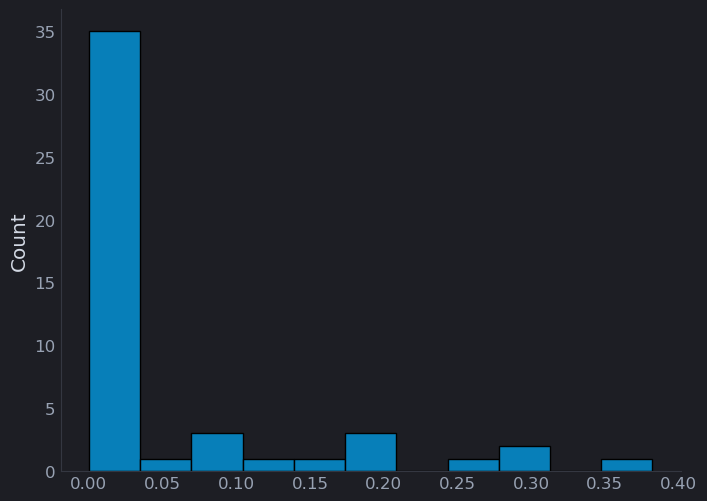

In [17]:
import numpy as np


sns.histplot([min(df.iloc[:30]['e_form']) - min(df['e_form']) for df in dfs])

In [6]:
from pyxtal import Wyckoff_position

df1 = json_to_df(run_id / 'total.json')
df1['wps'] = [[Wyckoff_position.from_group_and_letter(sg, letter) for letter in set(symm.wyckoff_symbols)] for i, (sg, symm) in df1[['run_sg', 'symm']].iterrows()]
df1.head()

,index,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,...,lat_a,lat_vol,best_relaxed,best_energy,symm,conv,run_sg,run_sg_symbol,wp_letters,wps
0,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,...,2.774850,21.365767,[[-2.88021662e-10 -2.59219494e-09 -2.88021650e...,-10.735821,"[[0. 0. 0.] Ga, [1.38742495 1.38742495 1.38742...","[[0. 0. 0.] Ga, [1.38742495 1.38742495 1.38742...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
1,166,mp-2226,DyPd,2,221,2,Dy Pd,Cubic,binary_easy,0,...,3.193407,32.565875,[[-1.40172584e-09 5.36000000e-18 1.40172584e...,-11.578215,"[[0. 0. 0.] Dy, [1.59670341 1.59670341 1.59670...","[[0. 0. 0.] Dy, [1.59670341 1.59670341 1.59670...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
2,164,mp-1169,ScCu,2,221,2,Cu Sc,Cubic,binary_easy,0,...,3.082532,29.290221,"[[1.63126712 1.63126711 1.63126712] Sc, [-6.38...",-11.000602,"[[1.54126585 1.54126585 1.54126585] Sc, [0. 0....","[[1.54126585 1.54126585 1.54126585] Sc, [0. 0....",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
3,163,mp-2334,DyCu,2,221,2,Cu Dy,Cubic,binary_easy,0,...,3.299312,35.914539,[[ 3.45834649e-10 -2.07500777e-09 -1.38333850e...,-9.208326,"[[0. 0. 0.] Dy, [1.64965618 1.64965618 1.64965...","[[0. 0. 0.] Dy, [1.64965618 1.64965618 1.64965...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
4,157,mp-30746,YIr,2,221,2,Ir Y,Cubic,binary_easy,0,...,3.356295,37.807698,[[2.40844100e-09 1.72031501e-09 3.44063003e-10...,-16.909658,"[[0. 0. 0.] Y, [1.67814732 1.67814732 1.678147...","[[0. 0. 0.] Y, [1.67814732 1.67814732 1.678147...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...


In [7]:
df1

,index,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,...,lat_a,lat_vol,best_relaxed,best_energy,symm,conv,run_sg,run_sg_symbol,wp_letters,wps
0,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,...,2.774850,21.365767,[[-2.88021662e-10 -2.59219494e-09 -2.88021650e...,-10.735821,"[[0. 0. 0.] Ga, [1.38742495 1.38742495 1.38742...","[[0. 0. 0.] Ga, [1.38742495 1.38742495 1.38742...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
1,166,mp-2226,DyPd,2,221,2,Dy Pd,Cubic,binary_easy,0,...,3.193407,32.565875,[[-1.40172584e-09 5.36000000e-18 1.40172584e...,-11.578215,"[[0. 0. 0.] Dy, [1.59670341 1.59670341 1.59670...","[[0. 0. 0.] Dy, [1.59670341 1.59670341 1.59670...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
2,164,mp-1169,ScCu,2,221,2,Cu Sc,Cubic,binary_easy,0,...,3.082532,29.290221,"[[1.63126712 1.63126711 1.63126712] Sc, [-6.38...",-11.000602,"[[1.54126585 1.54126585 1.54126585] Sc, [0. 0....","[[1.54126585 1.54126585 1.54126585] Sc, [0. 0....",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
3,163,mp-2334,DyCu,2,221,2,Cu Dy,Cubic,binary_easy,0,...,3.299312,35.914539,[[ 3.45834649e-10 -2.07500777e-09 -1.38333850e...,-9.208326,"[[0. 0. 0.] Dy, [1.64965618 1.64965618 1.64965...","[[0. 0. 0.] Dy, [1.64965618 1.64965618 1.64965...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
4,157,mp-30746,YIr,2,221,2,Ir Y,Cubic,binary_easy,0,...,3.356295,37.807698,[[2.40844100e-09 1.72031501e-09 3.44063003e-10...,-16.909658,"[[0. 0. 0.] Y, [1.67814732 1.67814732 1.678147...","[[0. 0. 0.] Y, [1.67814732 1.67814732 1.678147...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
5,158,mp-2735,PaO,2,225,2,O Pa,Cubic,binary_easy,0,...,4.698748,103.740028,[[ 2.47151813e+00 -3.99430363e-09 9.11392749e...,-77.564613,"[[2.34937382 0. 0. ] Pa, [0. ...","[[0. 0. 2.34937382] Pa, [-1.43...",225,Fm-3m,b_a,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
6,58,mp-11390,LiGaSi,3,216,3,Ga Li Si,Cubic,ternary_easy,0,...,4.533439,93.171532,"[[4.41004722 4.41004719 4.41004706] Li, [4.410...",-44.132347,"[[3.40007901 3.40007901 3.40007901] Li, [3.400...","[[1.13335967 1.13335967 3.40007901] Li, [1.133...",216,F-43m,c_d_a,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
7,159,mp-24658,SmH2,3,225,2,H Sm,Cubic,binary_easy,0,...,5.219108,142.163752,[[2.41337925e-09 2.69084498e+00 2.69084494e+00...,-53.924118,"[[0. 2.60955405 2.60955405] Sm, [2.609...",[[-1.59789101e-16 2.60955405e+00 2.60955405e...,221,Pm-3m,a_g_c,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
8,57,mp-30648,LiMg2Ga,4,225,3,Ga Li Mg,Cubic,ternary_easy,0,...,5.060721,129.609598,"[[1.67504938 1.67504923 1.67504918] Mg, [1.675...",-35.831345,"[[1.26518023 1.26518023 1.26518023] Mg, [1.265...",[[2.53036046e+00 0.00000000e+00 1.54939892e-16...,225,Fm-3m,c_b_a,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...
9,49,mp-20389,Na2CdPb,4,216,3,Cd Na Pb,Cubic,ternary_easy,0,...,7.352208,397.423273,[[ 3.79637139e+00 -1.44000001e-08 -5.68870967e...,-31.505672,"[[3.67610383 0. 0. ] Cd, [0. ...",[[-2.25096439e-16 3.67610383e+00 3.67610383e...,215,P-43m,b_a_d_c_e,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...


In [ ]:
quick_view(df1['struct'][35])

In [148]:
df1[['true_e_form', 'true_relaxed']] = task_df.iloc[:48][['true_e_form', 'true_relaxed']].values

<Axes: xlabel='scale', ylabel='Proportion'>

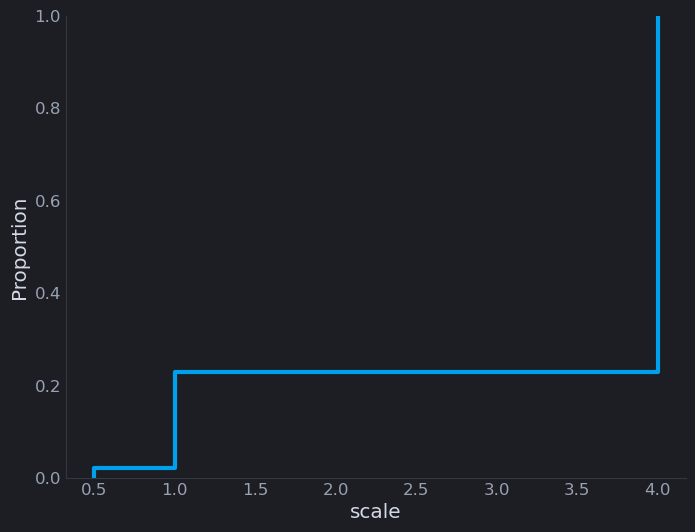

In [149]:
df1['conv_nsites'] = [x.num_sites for x in df1['conv']]
df1['scale'] = df1.eval('conv_nsites / nsites')
df1['best_e_form'] = df1.eval('best_energy / scale')
sns.ecdfplot(df1, x='scale')

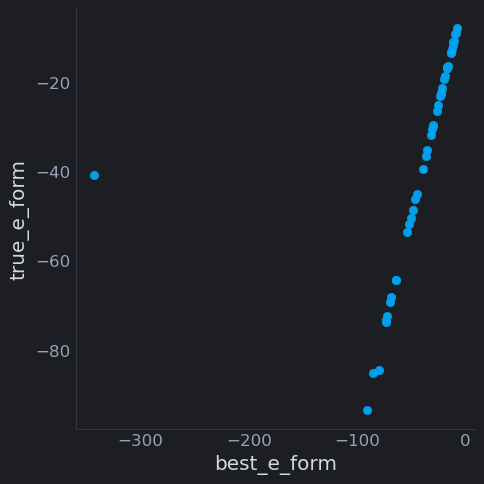

In [150]:
sns.relplot(df1.query('e_form < 80'), x='best_e_form', y='true_e_form', edgecolor=None)

In [152]:
df1.head()

,index,material_id,formula_pretty,nsites,spacegroup,nelements,elements_list,CrystalSystem,category,nontrivial_coordinates,...,conv,run_sg,run_sg_symbol,wp_letters,wps,conv_nsites,scale,best_e_form,true_e_form,true_relaxed
0,160,mp-1121,GaCo,2,221,2,Co Ga,Cubic,binary_easy,0,...,"[[0. 0. 0.] Ga, [1.38742495 1.38742495 1.38742...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...,2,1.0,-10.735821,-10.735801,"[[1.43931701 1.43931701 1.43931701] Ga, [ 9.01..."
1,166,mp-2226,DyPd,2,221,2,Dy Pd,Cubic,binary_easy,0,...,"[[0. 0. 0.] Dy, [1.59670341 1.59670341 1.59670...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...,2,1.0,-11.578215,-11.578162,[[7.44912150e-10 1.48626378e-10 1.07030295e-09...
2,164,mp-1169,ScCu,2,221,2,Cu Sc,Cubic,binary_easy,0,...,"[[1.54126585 1.54126585 1.54126585] Sc, [0. 0....",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...,2,1.0,-11.000602,-11.000504,"[[1.62950329 1.62950328 1.62950327] Sc, [2.006..."
3,163,mp-2334,DyCu,2,221,2,Cu Dy,Cubic,binary_easy,0,...,"[[0. 0. 0.] Dy, [1.64965618 1.64965618 1.64965...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...,2,1.0,-9.208326,-9.208327,[[ 2.24310319e-10 -1.29917895e-09 -1.46929928e...
4,157,mp-30746,YIr,2,221,2,Ir Y,Cubic,binary_easy,0,...,"[[0. 0. 0.] Y, [1.67814732 1.67814732 1.678147...",221,Pm-3m,a_b,[(Rot:\n[[0. 0. 0.]\n [0. 0. 0.]\n [0. 0. 0.]]...,2,1.0,-16.909658,-16.909657,"[[1.72045259 1.72045259 1.72045259] Y, [-5.137..."


<Axes: xlabel='spacegroup', ylabel='run_sg'>

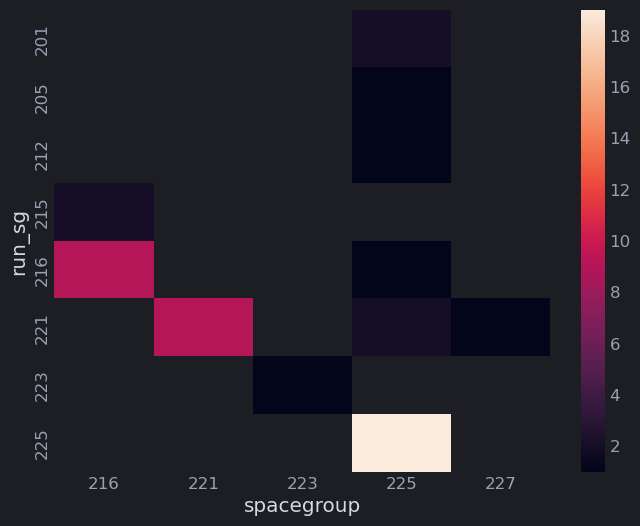

In [153]:
sns.heatmap(df1.pivot_table(index='run_sg', columns='spacegroup', values='e_form', aggfunc=len))

In [155]:
df1['true_wp_letters'] = ['_'.join(set(symm.wyckoff_letters)) for symm in df1['symm']]
df1.query('run_sg == spacegroup').pivot_table(index='true_wp_letters', columns='wp_letters', values='index', aggfunc=len)

wp_letters,a_b,a_c,a_d_b,b_a,c_b_a,c_b_d_a,c_d_a,c_e_b_a,c_e_f_d_a,d_b,e_b_d,e_c_b_a,e_d_b
true_wp_letters,,,,,,,,,,,,,
a_c,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a_c_d,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
b_a,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b_a_c,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b_a_c_d,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b_a_c_e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,3.0,NaN
b_a_d,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b_d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
b_d_e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0


In [160]:
df1['matches'] = [row['conv'].matches(row['best_relaxed']) for i, row in df1.iterrows()]
df1['matches'].mean()

0.9583333333333334

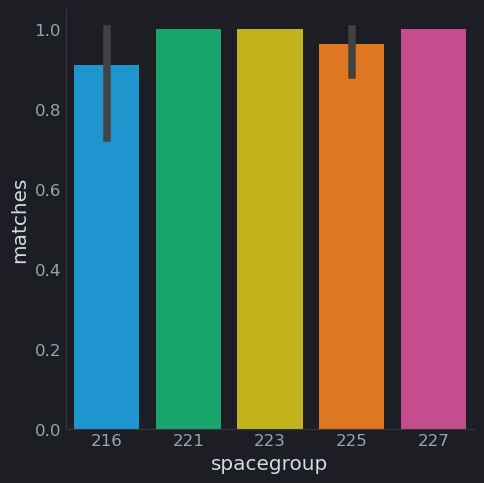

In [161]:
sns.catplot(df1, x='spacegroup', y='matches', kind='bar')

In [162]:
df1.columns

Index(['index', 'material_id', 'formula_pretty', 'nsites', 'spacegroup',
       'nelements', 'elements_list', 'CrystalSystem', 'category',
       'nontrivial_coordinates', 'struct', 'e_form', 'best_struct',
       'raw_e_form', 'lat_a', 'lat_vol', 'best_relaxed', 'best_energy', 'symm',
       'conv', 'run_sg', 'run_sg_symbol', 'wp_letters', 'wps', 'conv_nsites',
       'scale', 'best_e_form', 'true_e_form', 'true_relaxed',
       'true_wp_letters', 'matches'],
      dtype='object')

In [186]:
import numpy as np


df1['raw_per_atom'] = df1['raw_e_form']
df1['best_per_atom'] = df1['best_energy'] / np.array([x.num_sites for x in df1['best_relaxed']])
df1['true_raw_per_atom'] = df1['e_form'] / np.array([x.num_sites for x in df1['struct']])
df1['true_per_atom'] = df1['true_e_form'] / np.array([x.num_sites for x in df1['true_relaxed']])

In [188]:
df1['true_lat_a'] = [struct.lattice.a for struct in df1['conv']]
df1['true_lat_vol'] = [struct.lattice.volume for struct in df1['conv']]

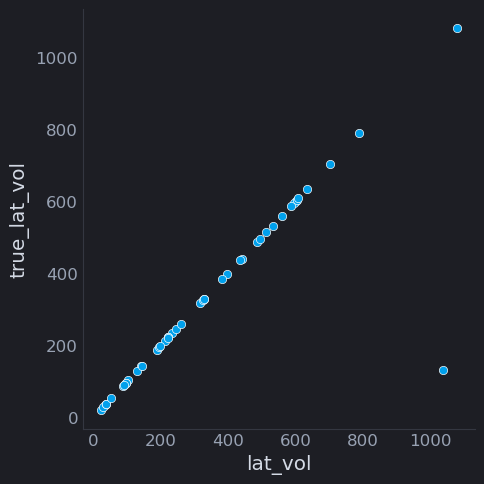

In [193]:
sns.relplot(df1, x='lat_vol', y='true_lat_vol')

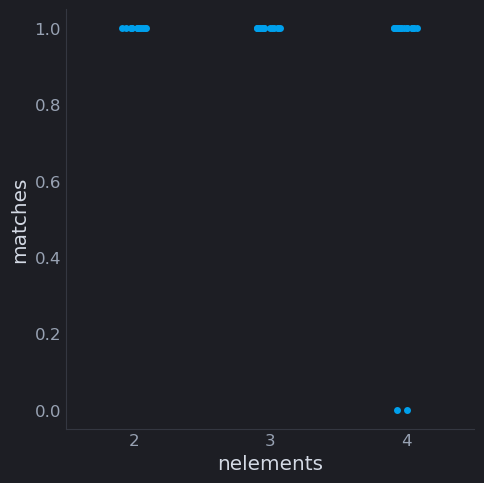

In [194]:
sns.catplot(df1, x='nelements', y='matches')